# APRENDIZAJE AUTOMÁTICO - PRÁCTICA 2

## CLASIFICACIÓN CON ÁRBOLES Y _RANDOM FOREST_

### Panagiotis Mourtis Ioannou 
### Iván Jesús Zepeda González
### Juan Julio González Paredes

De acuerdo con el texto de la descripción de la actividad la práctica debe contener:

*	Análisis descriptivo de los datos.
*	Determinar el conjunto de modelización y el de validación.
*	Tratamiento de _missing_ (si los hay).
*	Tratamiento de variables categóricas.
*	Calcular las métricas de evaluación de ajuste adecuadas.
*	Comparar mediante las medidas que parezcan adecuadas la capacidad predictiva de ambos métodos.
*	Comentar los resultados obtenidos.
*	Otros comentarios que parezcan adecuados.
*	Repite el ejercicio haciendo el siguiente grupo y desarrollando un algoritmo de clasificación: grupo 1 si cnt<=20, grupo 2 en otro caso.


Para poder cumplir con los objetivos de la práctica, se pretende tener un modelo predictivo basado en __Arboles y Random Forest__. Antes de poder entrenar el clasificador hay que estudiar el conjunto de datos así como limpiar y prepararlos. Dividimos el ejercicio en distintas fases quedando de la siguiente manera:

1. Importar los datos
2. Análisis descriptivo de los datos 
3. Limpiar y tratar el _dataset_ (Tratamiento de _missing_)
4. Modelo basado en Arboles para Regresión
    * 4.1. División _Dataset_ en conjuntos Modelización/Validación & Entrenamiento del clasificador.
    * 4.2. Evaluación del clasificador
    
5. Modelo basado en Random Forest Regresión
    * 5.1. División _Dataset_ en conjuntos Modelización/Validación & Entrenamiento del clasificador
    * 5.2. Evaluación del clasificador
    ( Combinacion de modelos , Clasificación = votacion , Regresion = media , no validación cruzada ya que hace bagging )
    
6. Modelo basado en Arboles para Clasificacion. Las clases vendran definidas por: Clase 1 si cnt<=20, Clase 2 en otro caso.
    * 6.1. División _Dataset_ en conjuntos Modelización/Validación & Entrenamiento del clasificador.
    * 6.2. Evaluación del clasificador
    
__EJERCICIO EXTRA__
7. Modelo basado en Random Forest Clasificacion.
    * 7.1. División _Dataset_ en conjuntos Modelización/Validación & Entrenamiento del clasificador
    * 7.2. Evaluación del clasificador
   
    

## Librerías necesarias

In [1]:
# Importamos la libreria que nos va a hacer falta para cargar el fichero
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

from graphviz import Source 
import pydotplus
from pydotplus import graph_from_dot_data
from IPython.display import Image  
import collections

## 1. Importar Datos

In [2]:
# Realizamos la lectura del fichero indicandole que la primera linea no es de cabecera
data_day = pd.read_csv("day.csv")
data_hour = pd.read_csv("hour.csv")

In [3]:
# Visualizamos como ha quedado el dataframe
pd.set_option('display.width', 130)
data_hour.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


## 2. Análisis descriptivo de los datos

Veamos a continuación la descripción del contenido de los _datasets_:

In [4]:
data_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:
data_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## 3. Limpieza de Dataset (tratamiento de _Missing_)

Comprobamos si hay algún valor considerado _null_ en los _datasets_:

In [6]:
data_day.isnull().any()

instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

In [7]:
data_hour.isnull().any()

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

Los _datasets_ de hora y dia, contienen la misma información, pero el de hora, contiene el _feature_ 'hr', que no se encuentra en día. Por esta razón, se usará solamente _data_hour_.

Eliminamos las siguientes columnas y justificamos su motivo:
* _instant_ - La eliminamos porque tan solo es un indice de registro que no aporta valor
* _casual_ y _register_ - la eliminamos porque su suma es el valor de la columna 'cnt', de modo que son redundantes
* _dteday_ - al disponer solo de 2 años de información, el número/nombre del día no tiene suficientes años como para poder tener un ciclo completo para una representacion. Además, como tenemos en otras columnas meses, años, día, etc no añade ningún valor


Como tenemos que hacer modelos de regresión y de clasificación se separan los _features_ en dos listas para facil acceso.

In [8]:
variables_categoricas = ['season', 'holiday', 'mnth', 'hr', 'weekday', 'workingday', 'weathersit']
variables_numericas = ['temp', 'atemp', 'hum', 'windspeed']
y = ['cnt']
variables=variables_categoricas+variables_numericas

Además de las columnas elimnadas vamos a estudiar a continuación si existe correlación entre variables. En caso de tener una alta correlación podríamos considerarlas redundantes y descartarlas:

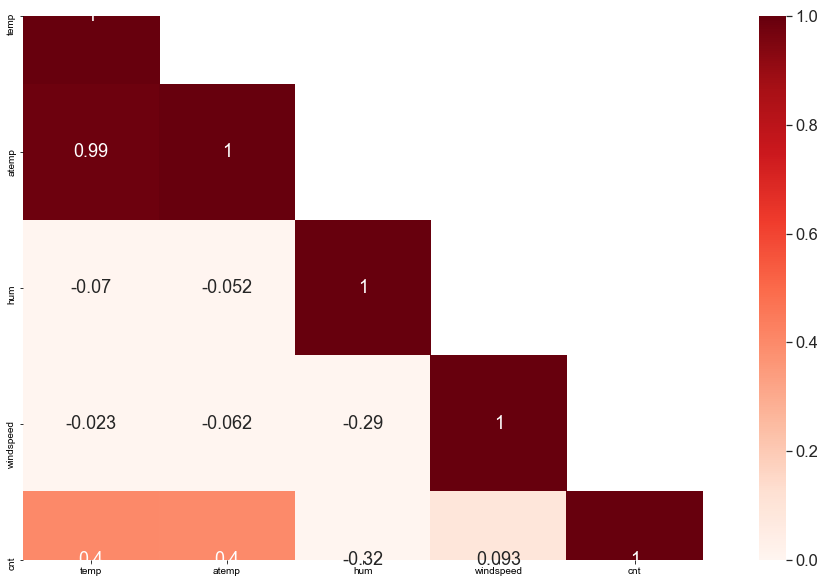

In [9]:
# Creamos la matriz de correlaciones entre variables
matrix = data_hour[variables_numericas + y].corr()

#Visualizamos la matriz de correlación
matrix.style.background_gradient(cmap='coolwarm') #se puede prescindir de cmap='coolwarm'
heat = np.array(matrix)
heat[np.tril_indices_from(heat)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.set(font_scale=1.5)
sns.heatmap(matrix, mask=heat,vmax=1.0, vmin=0.0, square=True,annot=True, cmap="Reds")
plt.show()

Como podemos ver en la figura hay una alta correlación, casi '1' entre 'atemp' y 'temp', por lo que podemos eliminar una de estas dos columnas tambien.

Procedemos a las eliminaciones que hemos descrito anteriormente:

In [10]:
eliminables = ['instant','casual','registered','dteday','atemp']
df_hour = data_hour.drop(eliminables, 1)
variables_limpias=["season","yr","mnth","hr","holiday","weekday","workingday","weathersit","temp","hum","windspeed"]

Visualizamos como ha quedado el _dataset_ de trabajo:

In [11]:
df_hour.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1


In [12]:
data_hour.shape

(17379, 17)

## 4. Modelo basado en Árboles para Regresión

In [13]:
# Hacemos una copia del dataset de trabajo para poder operar y realizar modificaciones pero manteniendo el ya limpiado
df_reg=df_hour.copy()

# Obtenemos los nombres de las columnas
colnames=df_reg.columns.values.tolist()

# Separamos en listas distintas las variables que utilizamos como input del target
predictors= colnames[:11] 
target = colnames[11] #cnt

# Creamos dataframes con la informacion de inputs y labels
Xr=df_reg[predictors]
Yr=df_reg[target]

# Visualizamos las listas que hemos creado
print("Lista de variables utilizadas como input: ", predictors)
print("Variable a predecir: ", target)

Lista de variables utilizadas como input:  ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed']
Variable a predecir:  cnt


In [14]:
# Creamos el objeto con el modelo de arbol de regresion
regtree = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=500, random_state=10)

In [15]:
# Procedemos al entrenamiento del modelo
regtree.fit(Xr,Yr)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=500,
                      min_samples_split=30, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=10, splitter='best')

In [16]:
# Creamos el vector de predicciones
preds = regtree.predict(df_reg[predictors])

In [17]:
 #crear una columna nueva con las predicciones
df_reg['preds']=preds

In [18]:
df_reg[['preds','cnt']]

,preds,cnt
0,32.496749,16
1,32.496749,40
2,24.091814,32
3,24.091814,13
4,24.091814,1
...,...,...
17374,216.346899,119
17375,125.065574,89
17376,125.065574,90
17377,125.065574,61


### Crear gráfico de árbol

Hacemos un gráfico del arbol para visualizar como ha quedado: 

In [19]:
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

# Visualize data
dot_data = tree.export_graphviz(regtree,
                                feature_names=predictors,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))
for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

In [20]:
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

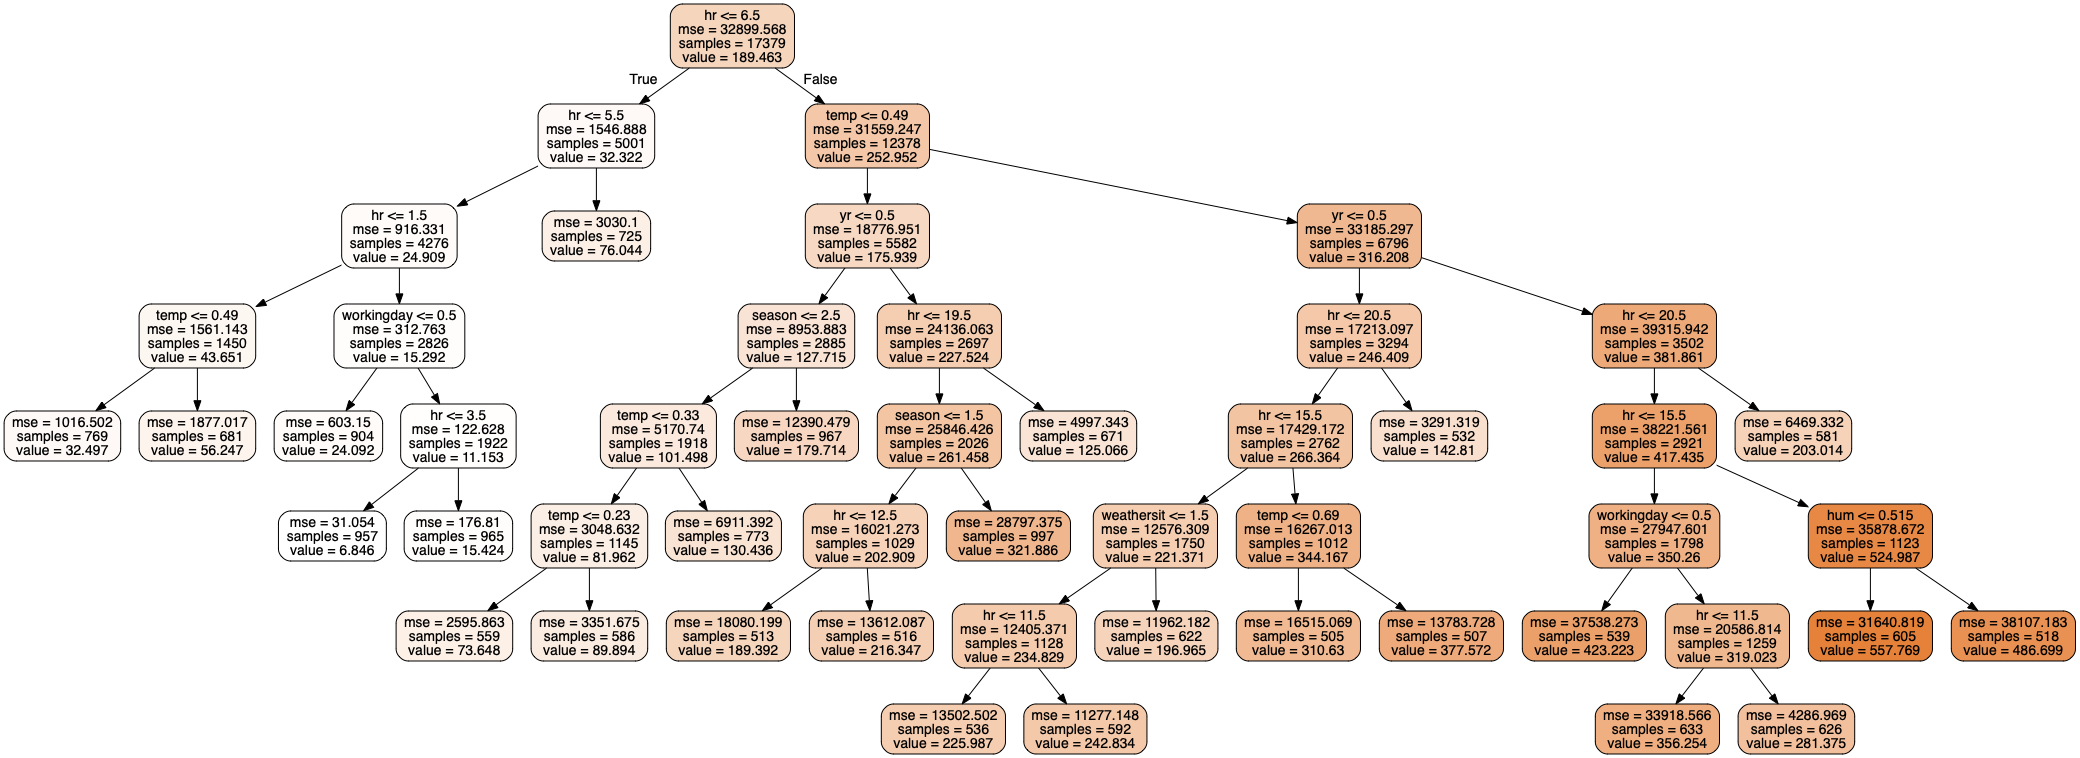

In [21]:
# Show graph
Image(graph.create_png())

### Validación de resultados 

Hacemos los cálculos de efectividad del modelo (MSE, r2) utilizando validación cruzada:

In [22]:
#cross validation
cv=KFold(n_splits=10, shuffle=True, random_state=99)
# Definimos las medidas a utilizar
scoring2="neg_mean_squared_error"    
scoring4="r2"    

# Calculo para MSE
scoring=scoring2
scores = -cross_val_score(regtree, Xr, Yr, scoring=scoring,cv=cv, n_jobs=1)
score=np.mean(scores)
print("MSE: ",str(score))

# Calculo para r2
scores = cross_val_score(regtree, Xr, Yr, scoring=scoring4,cv=cv, n_jobs=1)
score=np.mean(scores)
print("r2: ",str(score))

MSE:  11655.151257087939
r2:  0.6457565330967997


### Importancia de los _features_

In [23]:
list(zip(predictors,regtree.feature_importances_))

[('season', 0.029825374887879327),
 ('yr', 0.12098198078529697),
 ('mnth', 0.0),
 ('hr', 0.6638529965554575),
 ('holiday', 0.0),
 ('weekday', 0.0),
 ('workingday', 0.011286513788993147),
 ('weathersit', 0.0015443640803823708),
 ('temp', 0.1687216935324756),
 ('hum', 0.00378707636951525),
 ('windspeed', 0.0)]

### Conclusión
Podemos observar que la variable (feature) con mayor importancia es "hr" siendo para hora, seguido de "temp"=temperatura y de "yr"=año.

Con un resultado de r2 = 0.64 podemos concluir que aunque el modelo es aceptable, no es de gran calidad

## 5. Modelo basado en _Random Forest Regression_

In [24]:
# Creamos el objeto del modelo Random Forest para regresion
rfr=RandomForestRegressor( n_jobs=3,oob_score=True, n_estimators=200, random_state = 30)
# Entrenamos el modelo
rfr.fit(Xr, Yr) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=3,
                      oob_score=True, random_state=30, verbose=0,
                      warm_start=False)

In [25]:
# Calculamos el Out Of the Bag del modelo
print("Out Of the Bag prediction: ", rfr.oob_prediction_)

Out Of the Bag prediction:  [33.1        24.80246914 15.24193548 ... 83.75       73.2345679
 48.2987013 ]


In [26]:
df_reg['rforest_pred']=rfr.oob_prediction_
df_reg[['rforest_pred','cnt']]

,rforest_pred,cnt
0,33.100000,16
1,24.802469,40
2,15.241935,32
3,11.974026,13
4,3.038462,1
...,...,...
17374,136.453125,119
17375,98.797101,89
17376,83.750000,90
17377,73.234568,61


### Validación

In [27]:
df_reg['rforest_error2']=(df_reg['rforest_pred']-df_reg['cnt'])**2
print("MSE: ", sum(df_reg['rforest_error2'])/len(df_reg))

MSE:  1767.6235511255124


In [28]:
print("Out Of the Bag score: ", rfr.oob_score_)

Out Of the Bag score:  0.9462721347940094


### Conclusión
Si, el árbol y el bosque funcionó correctamente
el índice de _score_ se redujo considerablemente, 
de 2815 a 1788

El _score_ de _out of the bag_ queda de .94

## 6. Modelo basado en Árboles para Clasificación. 
### Árbol de Clasificación

Las clases vendrán definidas por:
 * Clase 1 si cnt<=20
 * Clase 2 en otro caso.

In [29]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics 

In [30]:
# Hacemos una copia de los datos
df_clas=df_hour.copy() 

# Construimos las categorias de 'cnt'
df_clas.loc[df_clas['cnt']<=20,'cnt_category']=int(0)
df_clas.loc[df_clas['cnt']> 20,'cnt_category']=int(1)
df_clas["cnt_category"]=df_clas["cnt_category"].astype("int")
df_clas["cnt_category"]=df_clas["cnt_category"].astype("category")
eliminable = ['cnt_category']

# Visualizamos
df_clas

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,cnt_category
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0000,16,0
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0000,40,1
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0000,32,1
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0000,13,0
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.60,0.1642,119,1
17375,1,1,12,20,0,1,1,2,0.26,0.60,0.1642,89,1
17376,1,1,12,21,0,1,1,1,0.26,0.60,0.1642,90,1
17377,1,1,12,22,0,1,1,1,0.26,0.56,0.1343,61,1


In [31]:
# Comprobamos los tipos de cada variables
print(df_clas.dtypes)
df_clas.shape

season             int64
yr                 int64
mnth               int64
hr                 int64
holiday            int64
weekday            int64
workingday         int64
weathersit         int64
temp             float64
hum              float64
windspeed        float64
cnt                int64
cnt_category    category
dtype: object


(17379, 13)

Visualizamos la distribucion del valor 'cnt' frente a la distribucion de la categoria que hemos creado 'cnt_category':

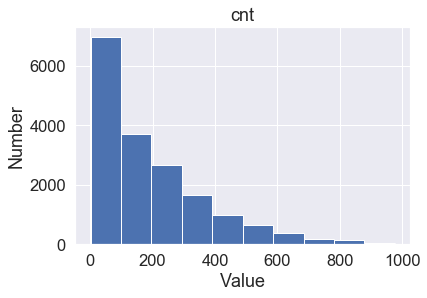

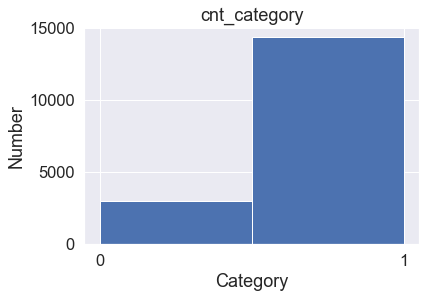

In [32]:
plt.hist(df_clas.cnt)
plt.xlabel("Value")
plt.ylabel("Number")
plt.title("cnt")
plt.show()
plt.hist(df_clas.cnt_category, bins = 2)
plt.xlabel("Category")
plt.ylabel("Number")
plt.title("cnt_category")
plt.xticks(ticks = [0,1])
plt.show()

In [33]:
target = ['cnt_category']

In [34]:
# Creamos los dataframes diferenciados con los input y el target
colnames=df_clas.columns.values.tolist()
predictors= colnames[:11]
target = colnames[12] #cnt
Xc=df_clas[predictors]
Yc=df_clas[target]
print("Variables: ", predictors)
print("Target: ", target)

Variables:  ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed']
Target:  cnt_category


In [35]:
# Split dataset into training set and test set, 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(Xc, Yc, test_size=0.3, random_state=1) 

Creamos el objeto '_Árbol Clasificador'_

In [36]:
treeclf = DecisionTreeClassifier(criterion="entropy", max_depth=3,min_samples_split=20,random_state=99)
treeclf.fit(X_train,y_train)
yy_pred=treeclf.predict(X_test)

In [37]:
# Predecimos la respuesta para test dataset
preds = treeclf.predict(X_train) #X_test

# Calculamos el Accuracy del model
print("Accuracy:",metrics.accuracy_score(y_test, yy_pred))

Accuracy: 0.9129267357115458


In [38]:
# Comprobamos las dimensiones de los dataframes
print(y_test.shape)#17379 30%
print(preds.shape)#17379 70%

(5214,)
(12165,)


### Visualización del árbol 

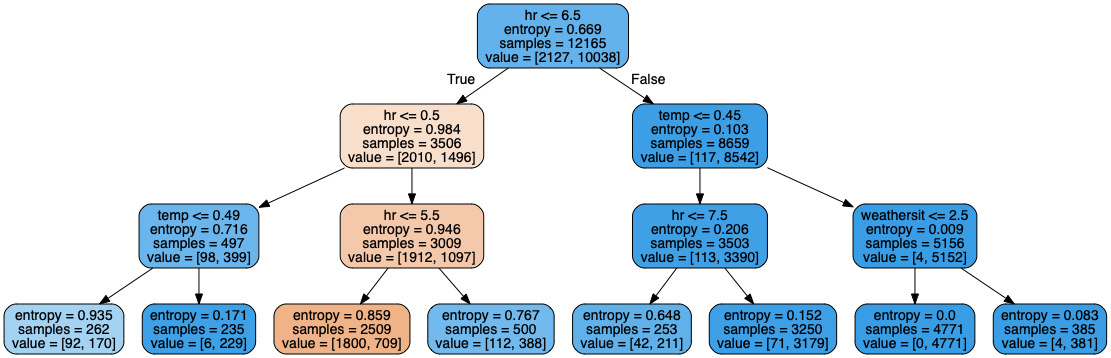

In [39]:
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

# Visualize data
dot_data = tree.export_graphviz(treeclf,
                                feature_names=predictors,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))
for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data) 
# Show graph
Image(graph.create_png())

### _CrossValidation_ para Poda

Vamos a realizar una poda del modelo para evitar _overfitting_ haciendo el calculo de la maxima profundidad del arbol para a continuación establecer el punto optimo de poda.

In [40]:
X_cv=df_clas[predictors]
Y_cv=df_clas[target]
#Se puede hacer tambien con criterion="gini"
tree_cv =DecisionTreeClassifier(criterion="entropy", min_samples_split=20,max_depth=5, random_state=40)
tree_cv.fit(X_cv,Y_cv)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=40, splitter='best')

In [41]:
cv=KFold(n_splits=10,shuffle=True,random_state=40)

In [42]:
score = np.mean(cross_val_score(tree_cv,X_cv,Y_cv, scoring="accuracy",cv=cv, n_jobs=2))
print ("Accuracy: ", score)

Accuracy:  0.9463715995132012


Se puede determinar cuántos _splits_ usar.
Se muestra el _score_ por cantidad de profundidad, y que _feature_ es más importante para hacer el _split_

In [43]:
for i in range (1,14):
    tree_test = DecisionTreeClassifier(criterion='entropy',max_depth=i,min_samples_split=20,random_state=40)
    tree_test.fit(X_cv,Y_cv)
    cv=KFold(n_splits=10,shuffle=True,random_state=40)
    scores=cross_val_score(tree_test,X_cv,Y_cv,scoring='accuracy',cv=cv,n_jobs=2)
    score=np.mean(scores)
    print('Score #',i,' es:',score)
        
print(predictors)

Score # 1  es: 0.8639152726186241
Score # 2  es: 0.8904990085812544
Score # 3  es: 0.9142636769743742
Score # 4  es: 0.9187515609959369
Score # 5  es: 0.9463715995132012
Score # 6  es: 0.9518956535910691
Score # 7  es: 0.9552902276520037
Score # 8  es: 0.9598362121907738
Score # 9  es: 0.9595485583188083
Score # 10  es: 0.9588004065048731
Score # 11  es: 0.9583401073103965
Score # 12  es: 0.9580523209401021
Score # 13  es: 0.9571892268258766
['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed']


Observando la evolución de los resultados vemos que en la octava iteración obtenemos el mejor resultado, veamos a continuación cual es la importancia de cada variable en esta iteración:

In [44]:
tree_test = DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_split=20,random_state=40)
tree_test.fit(X_cv,Y_cv)
cv=KFold(n_splits=10,shuffle=True,random_state=40)
scores=cross_val_score(tree_test,X_cv,Y_cv,scoring='accuracy',cv=cv,n_jobs=2)
score=np.mean(scores)
print('Score #8',' es:',score)
print('Las variables más importantes para la mejor profundidad: ',tree_test.feature_importances_)

Score #8  es: 0.9598362121907738
Las variables más importantes para la mejor profundidad:  [0.01704232 0.01765882 0.01317696 0.78409753 0.00298939 0.01397605
 0.06260626 0.01378602 0.06166527 0.00995496 0.00304642]


### Conclusiones
Se puede notar que el _score_ se incremente con más profundidad, aunque es minúsculo el crecimiento.

Segun hemos visto en la visualización de las distribuciones de 'cnt' y la variables que hemos creado 'cnt_category' los datos estan fuertemente desbalanceados, lo cúal puede tener un impacto notable en la calidad del modelo.

## EJERCICIO EXTRA

## 7. Modelo basado en _Random Forest_ para clasificación.


Creamos el modelo y lo entrenamos:

In [45]:
rfc= RandomForestClassifier(n_jobs=2,oob_score=True,n_estimators=30, random_state = 20) #si se baja el numero de n_estimators de 27 no considera una buena opcion para OOB
rfc.fit(Xc,Yc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=2,
                       oob_score=True, random_state=20, verbose=0,
                       warm_start=False)

In [46]:
# Out of Bag
rfc.oob_decision_function_

array([[0.26666667, 0.73333333],
       [0.5625    , 0.4375    ],
       [0.84615385, 0.15384615],
       ...,
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.07692308, 0.92307692]])

In [47]:
# Error de Out Of Bag
rfc.oob_score_

0.9608723171643938

Se puede comparar y notar una mejora entre arbol y random forest:

   - Tree Accuracy: 0.9463715995132012
   - Accuracy:      0.9598362121907738
   - RFC Accuracy : 0.9608723171643938
   
Nota: Dependiendo de la ejecución los valores sin random_state puede variar

   
  

## 8. Conclusiones

### Evaluación de modelos

Considerando las siguientes caracteristicas de los datos y el problema:
- La variable target (y) es numerica.
- Varias columnad no son de importancia para llegar al target
- contiene pocos registros

Podemos concluir que un Random Forest o un metodo de Regresion serian los mas adecuados.

## 9. Detalles del equipo y la práctica

* ¿Todos los miembros se han integrado al trabajo del grupo?
    - Si, los mencionados al inicio Iván Jesús Zepeda González, Juan Julio González Paredes, Panagiotis Mourtis.    
      Habia una cuarta integrante del grupo que no se ha puesto en contacto para la practica.
* ¿Todos los miembros participan activamente?
    - Si.
* ¿Todos los miembros respetan otras ideas aportadas?
    - Si.
* ¿Todos los miembros participan en la elaboración del informe?
    - Si.
* ¿Me he preocupado por realizar un trabajo cooperativo con mis compañeros?
    - Si.
* Señala si consideras que algún aspecto del trabajo en grupo no ha sido adecuado
    - 
